### -Addition-

In [1]:
import tensorflow as tf

tf.reset_default_graph()

a = tf.constant(2, name ="a")
b = tf.constant(3, name = "b")

x=tf.add(a,b, name ="add")


with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/run1', sess.graph) #create a writer object/we write operations to the event file/stored in /graphs
    print(sess.run(x))
    writer.close()
    


5


### -Range-

In [2]:
tf.reset_default_graph()

x=tf.range(3,8,1, name="Range")

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/run2', sess.graph) #create a writer object/we write operations to the event file/stored in /graphs
    print(sess.run(x))
    print(type(sess.run(x)))  #The output of sess.run() (tf.Session.run()) in an array!!!
    writer.close()

[3 4 5 6 7]
<class 'numpy.ndarray'>


### -Lazy Loading:-

In [3]:
import tensorflow as tf 

tf.reset_default_graph()

x = tf.Variable(10,name="x")
y = tf.Variable(20, name= "y")
z = tf.add(x,y)  #In this way we create only 1 add operation node!!!

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./graphs/normal_loading", sess.graph)
    for _ in range(10): #runs 10 iterations
        sess.run(z)
    writer.close()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:


x = tf.Variable(10,name="x")
y = tf.Variable(20, name= "y")


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./graphs/lazy_loading", sess.graph)
    for _ in range(10):
        sess.run(tf.add(x,y)) #In this way we create 10 add operation node!!!!
    print(tf.get_default_graph().as_graph_def())
    writer.close()

node {
  name: "x/initial_value"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 10
      }
    }
  }
}
node {
  name: "x"
  op: "VariableV2"
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
  attr {
    key: "shared_name"
    value {
      s: ""
    }
  }
}
node {
  name: "x/Assign"
  op: "Assign"
  input: "x"
  input: "x/initial_value"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@x"
      }
    }
  }
  attr {
    key: "use_locking"
    value {
      b: true
    }
  }
  attr {
    key: "validate_shape"
    value {
      b: true
    }
  }
}
node {
  name: "x/read"
  op: "Identity"
  input

### -Symple Linear Regression:-

#### Extraction from txt file and creation of a array (dimension 190,2)

In [4]:
import numpy as np
import tensorflow as tf
import time

f = open("birth_life_2010.txt")

x = []
for line in f.readlines():
    y = [value for value in line.split()]
    x.append(y)

f.close()
print (type(x))


x[0] = [x[0][0],x[0][1]+" "+x[0][2] , x[0][3]+" "+x[0][4]]

data = x

for value in data:
    if len(value) > 3:
        if (len(value)-2) % 2 == 0:
            value[0] = value[0]+ " " + value[1]
            del value[1]
        if (len(value)-2) % 3 == 0:
            value[0] = value[0] +" "+value[1]+" " +value[2]
            del value[1] 
            del value[1]
        if (len(value)-2) % 4 == 0:
            value[0] = value[0] +" "+value[1]+" " +value[2]
            del value[1] 
            del value[1]  
            del value[1]
        if (len(value)-2) % 5 == 0:
            value[0] = value[0] +" "+value[1]+" " +value[2]+" "+value[3]+" "+value[4]
            del value[1] 
            del value[1]
            del value[1]
            del value[1]

for value in data:
    del value[0]
            
del data[0]

data=np.array(data)

print("---------------")

print(data.shape)


    

<class 'list'>
---------------
(190, 2)


In [6]:
print(data)

[['1.822' '74.828243902']
 ['3.869' '70.819487805']
 ['3.911' '72.150658537']
 ['5.578' '61.999853659']
 ['1.579' '73.927658537']
 ['4.229' '67.465195122']
 ['1.15' '81.641463415']
 ['3.86' '72.306390244']
 ['3.142' '68.484317073']
 ['3.951' '62.440609756']
 ['2.16' '80.702439024']
 ['2.141' '76.301682927']
 ['2.002' '64.662097561']
 ['2.504' '68.194975610']
 ['3.451' '68.764829268']
 ['2.635' '74.024560976']
 ['1.092' '80.775317073']
 ['2.747' '67.064']
 ['1.22' '80.761951220']
 ['1.39' '82.932682927']
 ['2.117' '68.889658537']
 ['1.108' '82.878048780']
 ['2.47' '75.994268293']
 ['2.09' '75.076878049']
 ['2.668' '69.225829268']
 ['2.022' '68.532146341']
 ['1.598' '73.273097561']
 ['2.581' '62.536219512']
 ['2.042' '77.932024390']
 ['1.92' '81.695121951']
 ['2.499' '68.001']
 ['1.94' '80.402439024']
 ['1.445' '70.275609756']
 ['2.399' '64.863512195']
 ['2.088' '73.696658537']
 ['3.297' '67.259902439']
 ['1.5' '82.246341463']
 ['1.98' '81.451219512']
 ['1.39' '81.626829268']
 ['1.57' '7

#### Create the Linear Regression:

In [7]:
tf.reset_default_graph()

X =  tf.placeholder(tf.float32, name ="X") #birth rate
Y =  tf.placeholder(tf.float32, name="Y") # life expectancy

w = tf.get_variable("weights", initializer= tf.constant(0.0))
b = tf.get_variable("bias", initializer=tf.constant(0.0))

Y_pred = w*X + b

loss = tf.square(Y - Y_pred,name ='loss')  #cost function

optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.001).minimize(loss)

start = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #initialize all variables
    writer = tf.summary.FileWriter("./graphs/linear_regr", sess.graph)
    for i in range(100):
        for x, y in data:
            sess.run(optimizer, feed_dict={X:x, Y:y})

    w_out_loss, b_out_loss = sess.run([w,b])
       
    writer.close()

time1 = time.time() - start

print("The algo takes %.2f seconds" %time1)

The algo takes 8.84 seconds


#### Printing the values and the regression line: 

In [55]:
data1 =[[float(i), float(j)]for i,j in data]

data1 = np.asarray(data1)

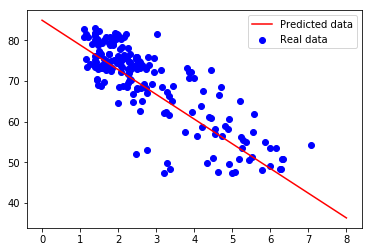

In [57]:
import matplotlib.pyplot as plt
import random



plt.scatter(data1[:,0],data1[:,1],color="blue", label="Real data")

X = np.arange(0,8,0.001)
plt.plot(X,X*w_out_loss+b_out_loss,'r',label= "Predicted data")

plt.legend()
plt.show()


#### Cost function that doesn't consider the outliers: -Huber loss-

In [9]:
#a function where we define the Huber loss function

def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels-predictions)
    def f1(): return 0.5*tf.square(residual)
    def f2(): return delta*residual - 0.5*tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

In [10]:
tf.reset_default_graph()

X =  tf.placeholder(tf.float32, name ="X") #birth rate
Y =  tf.placeholder(tf.float32, name="Y") # life expectancy

w = tf.get_variable("weights", initializer= tf.constant(0.0))
b = tf.get_variable("bias", initializer=tf.constant(0.0))

Y_pred = w*X + b

h_loss= huber_loss(Y, Y_pred)  #cost function

optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.001).minimize(h_loss)

start = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #initialize all variables
    writer = tf.summary.FileWriter("./graphs/linear_regr", sess.graph)
    for i in range(100):
        for x, y in data:
            sess.run(optimizer, feed_dict={X:x, Y:y})

    w_out_Hloss, b_out_Hloss = sess.run([w,b])
       
    writer.close()

time2 = time.time() - start

print("The algo takes %.2f seconds" %time2)

The algo takes 12.51 seconds


#### Printing the regression line and two regression (Huber loss):

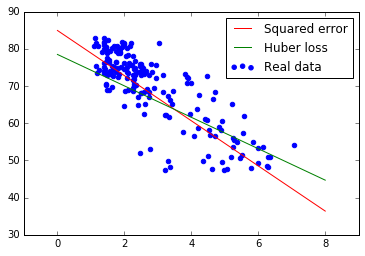

In [38]:
plt.scatter(data[:,0],data[:,1],color="blue", label="Real data")

X = np.arange(0,8,0.001)
plt.plot(X,X*w_out_loss+b_out_loss,'r',label= "Squared error")
plt.plot(X,X*w_out_Hloss+b_out_Hloss,'g',label="Huber loss")

plt.legend()
plt.show()

#### Using a tf.Dataset instead of an array for input data:

In [2]:
tf.reset_default_graph()

data = data.astype(np.float32)

dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

print("--------------------")                                             
print(dataset.output_types)
print(dataset.output_shapes)

--------------------
(tf.float32, tf.float32)
(TensorShape([]), TensorShape([]))


#### Using AN ITERATOR we can iterate through samples in the dataset:

In [3]:

w = tf.get_variable("weights", initializer= tf.constant(0.0))
b = tf.get_variable("bias", initializer=tf.constant(0.0))


iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next() #X is the birth rate and Y is the life expectancy

Y_pred = w*X + b

loss = tf.square(Y - Y_pred,name ='loss') 

optimizer = tf.train.GradientDescentOptimizer(learning_rate =0.001).minimize(loss)

# with tf.Session() as sess:   #each time we execute ops X, Y we get a new data point
#    print(sess.run([X,Y]))  # [1,822, 74,82825]
#    print(sess.run([X,Y]))  # [3,869, 70.81949]
#    print(sess.run([X,Y]))  # [3.911, 72,15066]


start = time.time()
    
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("./graphs/linear_reg_iterator", sess.graph)
    for i in range(100): #train the model on 100 epochs
        sess.run(iterator.initializer)   #We need to inizializate the iterator at the beginning of each epoch. 
        total_loss = 0                   #(After it has iterates all the data points!!!)
        try:
            while True:
                _, 1 == sess.run([optimizer, loss])
                total_loss +=1
        except tf.errors.OutOfRangeError:
            pass
        
        print ("Epoch {0}: {1}".format(i, total_loss/len(data)))
    writer.close()
    w_out_iterator, b_out_iterator = sess.run([w,b])
    
time3 = time.time() - start

print("The algo takes %.2f seconds" %time3)

Epoch 0: 1.0
Epoch 1: 1.0
Epoch 2: 1.0
Epoch 3: 1.0
Epoch 4: 1.0
Epoch 5: 1.0
Epoch 6: 1.0
Epoch 7: 1.0
Epoch 8: 1.0
Epoch 9: 1.0
Epoch 10: 1.0
Epoch 11: 1.0
Epoch 12: 1.0
Epoch 13: 1.0
Epoch 14: 1.0
Epoch 15: 1.0
Epoch 16: 1.0
Epoch 17: 1.0
Epoch 18: 1.0
Epoch 19: 1.0
Epoch 20: 1.0
Epoch 21: 1.0
Epoch 22: 1.0
Epoch 23: 1.0
Epoch 24: 1.0
Epoch 25: 1.0
Epoch 26: 1.0
Epoch 27: 1.0
Epoch 28: 1.0
Epoch 29: 1.0
Epoch 30: 1.0
Epoch 31: 1.0
Epoch 32: 1.0
Epoch 33: 1.0
Epoch 34: 1.0
Epoch 35: 1.0
Epoch 36: 1.0
Epoch 37: 1.0
Epoch 38: 1.0
Epoch 39: 1.0
Epoch 40: 1.0
Epoch 41: 1.0
Epoch 42: 1.0
Epoch 43: 1.0
Epoch 44: 1.0
Epoch 45: 1.0
Epoch 46: 1.0
Epoch 47: 1.0
Epoch 48: 1.0
Epoch 49: 1.0
Epoch 50: 1.0
Epoch 51: 1.0
Epoch 52: 1.0
Epoch 53: 1.0
Epoch 54: 1.0
Epoch 55: 1.0
Epoch 56: 1.0
Epoch 57: 1.0
Epoch 58: 1.0
Epoch 59: 1.0
Epoch 60: 1.0
Epoch 61: 1.0
Epoch 62: 1.0
Epoch 63: 1.0
Epoch 64: 1.0
Epoch 65: 1.0
Epoch 66: 1.0
Epoch 67: 1.0
Epoch 68: 1.0
Epoch 69: 1.0
Epoch 70: 1.0
Epoch 71: 1.0
Ep

In [12]:
print(w_out_iterator, b_out_iterator )

print("-------------------------------")

print("Time for time series with normal loss %.2f"  %time1)
print("Time for time series with huber loss %.2f"  %time2)
print("Time for time series with iterator/normal loss %.2f"  %time3)

-6.0702143 84.92951
-------------------------------
Time for time series with normal loss 11.78
Time for time series with huber loss 12.51
Time for time series with iterator/normal loss 10.65


#### Scatterplot with all methods:

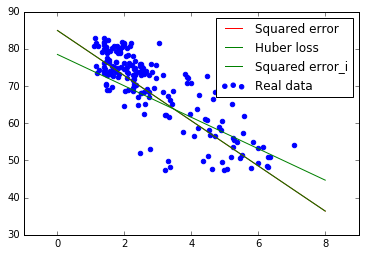

In [14]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1],color="blue", label="Real data")

X = np.arange(0,8,0.001)
plt.plot(X,X*w_out_loss+b_out_loss,'r',label= "Squared error")
plt.plot(X,X*w_out_Hloss+b_out_Hloss,'g',label="Huber loss")
plt.plot(X,X*w_out_iterator+b_out_iterator,'g',label="Squared error_i")

plt.legend()
plt.show()

#### Logistic Regression :

In [58]:
# As first example we use the Iris Dataset
# We want to predict iris Virginia type based only on petal width feature

from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys()) #data =[sepal lenght, sepal width,petal lenght, petal width]

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [63]:
X = iris["data"][:,3:] #We extract petal width
y = (iris["target"] == 2).astype(np.int) #If Iris-Virginia 1 else 0

C:\Users\nabu-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


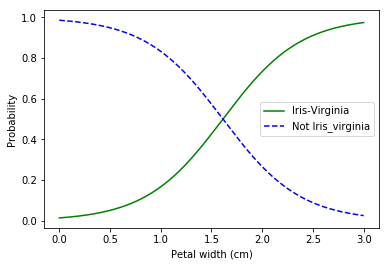

In [67]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() #We create an object of kind LogisticRegression()
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)  # We predict the probability with our training LogRegr (equal by setting parameters)
                                        # that minimize the log loss function) 

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginia")
plt.plot(X_new,y_proba[:,0],"b--", label="Not Iris_virginia")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

plt.legend()

C:\Users\nabu-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


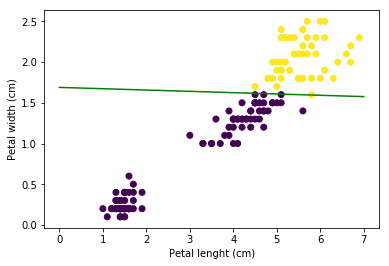

In [99]:
# Scatterplot with petal lenght , petal width and model's decision boundary (LogRegr = 0.5)

import matplotlib

X = iris["data"][:,2:] #We extract petal lenght and petal width

log_reg = LogisticRegression()
log_reg.fit(X,y)
Coef = log_reg.coef_
Intercept = log_reg.intercept_
ypred = log_reg.predict(X)

X_new = np.linspace(0,7,1000).reshape(-1,1)
y_50prob = -(Intercept +X_new*Coef[0][0])/Coef[0][1] # the points where the model estimates 50 % probability--> model's 
                                                                                                     #decision boundary
plt.scatter(iris["data"][:,2],iris["data"][:,3], c = ypred )
plt.plot(X_new,y_50prob,'g',label="0.50")


plt.xlabel("Petal lenght (cm)")
plt.ylabel("Petal width (cm)")


plt.show()

In [94]:
print(Predict)

[0 1]
